# 深度學習_女裝配件辨識
Tensorflow官網提供程式碼與資料集   
[資料集](https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a)  
[作法參考](https://ithelp.ithome.com.tw/articles/10233758)

資料集類別描述:  
0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot

## 一、載入資料並分割

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

#載入資料集mnist，並執行切割
ds = tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train),(x_test, y_test) = ds
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

X訓練資料 -> 6萬筆圖片(28*28pix)， y訓練資料 -> 6萬筆答案

X測試資料 -> 1萬筆圖片(28*28pix)， y測試資料 -> 1萬筆答案

訓練資料第2筆，標記為-T袖/上衣(0)-


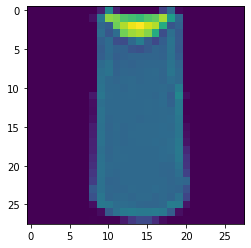

In [2]:
# Define the text labels
fashion_mnist_labels = ["T袖/上衣",   # index 0
                        "長褲",       # index 1
                        "套頭衫",     # index 2 
                        "洋裝",       # index 3 
                        "外套",       # index 4
                        "涼鞋",       # index 5
                        "襯衫",       # index 6 
                        "運動鞋",     # index 7 
                        "皮包",       # index 8 
                        "短靴"]       # index 9
img_index = 2
lab_index = y_train[img_index]
print(f'訓練資料第{img_index}筆，標記為-{fashion_mnist_labels[lab_index]}({lab_index})-')
plt.imshow(x_train[img_index])

In [3]:
# 顯示前10筆y_train
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

## 二、特徵工程

In [4]:
#特徵工程: (X-min)/(255-0)常態化
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 顯示第一筆資料
# x_train_norm[0]

## 三、訓練模型

In [5]:
#套入模型: Deep Learning
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #圖片28*28pix，input為這784
  tf.keras.layers.Dense(128, activation='relu'),  #Dense為連結層，128個神經元
  tf.keras.layers.Dropout(0.2),                   #訓練過程中隨機丟棄20%神經元
  tf.keras.layers.Dense(10, activation='softmax') #結果0~9，10個結果
])

In [6]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) #隨機梯度下降，註解3
model.compile(optimizer=optimizer, #'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
#訓練
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

Epoch 1/10


   1/1500 [..............................] - ETA: 0s - loss: 2.4670 - accuracy: 0.0625

  83/1500 [>.............................] - ETA: 0s - loss: 1.1445 - accuracy: 0.6035

 170/1500 [==>...........................] - ETA: 0s - loss: 0.9479 - accuracy: 0.6676

 255/1500 [====>.........................] - ETA: 0s - loss: 0.8600 - accuracy: 0.6996

 343/1500 [=====>........................] - ETA: 0s - loss: 0.8141 - accuracy: 0.7145

 427/1500 [=======>......................] - ETA: 0s - loss: 0.7711 - accuracy: 0.7289

 512/1500 [=========>....................] - ETA: 0s - loss: 0.7379 - accuracy: 0.7399



 599/1500 [==========>...................] - ETA: 0s - loss: 0.7135 - accuracy: 0.7487

 686/1500 [============>.................] - ETA: 0s - loss: 0.6933 - accuracy: 0.7544

 770/1500 [==============>...............] - ETA: 0s - loss: 0.6761 - accuracy: 0.7602

 857/1500 [================>.............] - ETA: 0s - loss: 0.6599 - accuracy: 0.7655



 944/1500 [=================>............] - ETA: 0s - loss: 0.6466 - accuracy: 0.7703

1028/1500 [===================>..........] - ETA: 0s - loss: 0.6365 - accuracy: 0.7741

1113/1500 [=====================>........] - ETA: 0s - loss: 0.6266 - accuracy: 0.7780

1199/1500 [======================>.......] - ETA: 0s - loss: 0.6177 - accuracy: 0.7810



1287/1500 [========================>.....] - ETA: 0s - loss: 0.6087 - accuracy: 0.7839

1371/1500 [==========================>...] - ETA: 0s - loss: 0.6025 - accuracy: 0.7861

1459/1500 [============================>.] - ETA: 0s - loss: 0.5952 - accuracy: 0.7884

1500/1500 [==============================] - 1s 791us/step - loss: 0.5917 - accuracy: 0.7899 - val_loss: 0.4702 - val_accuracy: 0.8246


Epoch 2/10
   1/1500 [..............................] - ETA: 0s - loss: 0.4403 - accuracy: 0.8438

  80/1500 [>.............................] - ETA: 0s - loss: 0.4483 - accuracy: 0.8418

 150/1500 [==>...........................] - ETA: 0s - loss: 0.4642 - accuracy: 0.8346

 237/1500 [===>..........................] - ETA: 0s - loss: 0.4507 - accuracy: 0.8403

 325/1500 [=====>........................] - ETA: 0s - loss: 0.4551 - accuracy: 0.8394

 410/1500 [=======>......................] - ETA: 0s - loss: 0.4555 - accuracy: 0.8383

 493/1500 [========>.....................] - ETA: 0s - loss: 0.4589 - accuracy: 0.8365



 572/1500 [==========>...................] - ETA: 0s - loss: 0.4536 - accuracy: 0.8373

 660/1500 [============>.................] - ETA: 0s - loss: 0.4535 - accuracy: 0.8367

 747/1500 [=============>................] - ETA: 0s - loss: 0.4524 - accuracy: 0.8371

 833/1500 [===============>..............] - ETA: 0s - loss: 0.4530 - accuracy: 0.8369

 919/1500 [=================>............] - ETA: 0s - loss: 0.4545 - accuracy: 0.8369

1004/1500 [===================>..........] - ETA: 0s - loss: 0.4528 - accuracy: 0.8372

1089/1500 [====================>.........] - ETA: 0s - loss: 0.4524 - accuracy: 0.8374

1176/1500 [======================>.......] - ETA: 0s - loss: 0.4517 - accuracy: 0.8371



1259/1500 [========================>.....] - ETA: 0s - loss: 0.4485 - accuracy: 0.8382

1347/1500 [=========================>....] - ETA: 0s - loss: 0.4462 - accuracy: 0.8389

1431/1500 [===========================>..] - ETA: 0s - loss: 0.4435 - accuracy: 0.8398



1500/1500 [==============================] - 1s 703us/step - loss: 0.4428 - accuracy: 0.8399 - val_loss: 0.3979 - val_accuracy: 0.8547


Epoch 3/10
   1/1500 [..............................] - ETA: 0s - loss: 0.6014 - accuracy: 0.7188

  86/1500 [>.............................] - ETA: 0s - loss: 0.4395 - accuracy: 0.8387

 173/1500 [==>...........................] - ETA: 0s - loss: 0.4270 - accuracy: 0.8436

 261/1500 [====>.........................] - ETA: 0s - loss: 0.4168 - accuracy: 0.8499

 345/1500 [=====>........................] - ETA: 0s - loss: 0.4118 - accuracy: 0.8515

 432/1500 [=======>......................] - ETA: 0s - loss: 0.4124 - accuracy: 0.8510

 519/1500 [=========>....................] - ETA: 0s - loss: 0.4122 - accuracy: 0.8515

 607/1500 [===========>..................] - ETA: 0s - loss: 0.4127 - accuracy: 0.8498



 691/1500 [============>.................] - ETA: 0s - loss: 0.4113 - accuracy: 0.8504

 780/1500 [==============>...............] - ETA: 0s - loss: 0.4130 - accuracy: 0.8499

 867/1500 [================>.............] - ETA: 0s - loss: 0.4110 - accuracy: 0.8505

 954/1500 [==================>...........] - ETA: 0s - loss: 0.4103 - accuracy: 0.8506



1038/1500 [===================>..........] - ETA: 0s - loss: 0.4089 - accuracy: 0.8512

1126/1500 [=====================>........] - ETA: 0s - loss: 0.4086 - accuracy: 0.8514

1211/1500 [=======================>......] - ETA: 0s - loss: 0.4062 - accuracy: 0.8524

1300/1500 [=========================>....] - ETA: 0s - loss: 0.4049 - accuracy: 0.8529



1383/1500 [==========================>...] - ETA: 0s - loss: 0.4038 - accuracy: 0.8530

1472/1500 [============================>.] - ETA: 0s - loss: 0.4023 - accuracy: 0.8537

1500/1500 [==============================] - 1s 687us/step - loss: 0.4025 - accuracy: 0.8538 - val_loss: 0.3744 - val_accuracy: 0.8640


Epoch 4/10
   1/1500 [..............................] - ETA: 0s - loss: 0.4142 - accuracy: 0.8438

  90/1500 [>.............................] - ETA: 0s - loss: 0.3930 - accuracy: 0.8458

 174/1500 [==>...........................] - ETA: 0s - loss: 0.4003 - accuracy: 0.8482

 262/1500 [====>.........................] - ETA: 0s - loss: 0.3954 - accuracy: 0.8513



 347/1500 [=====>........................] - ETA: 0s - loss: 0.3948 - accuracy: 0.8519

 435/1500 [=======>......................] - ETA: 0s - loss: 0.3912 - accuracy: 0.8527

 522/1500 [=========>....................] - ETA: 0s - loss: 0.3878 - accuracy: 0.8549

 604/1500 [===========>..................] - ETA: 0s - loss: 0.3874 - accuracy: 0.8566

 679/1500 [============>.................] - ETA: 0s - loss: 0.3886 - accuracy: 0.8566

 767/1500 [==============>...............] - ETA: 0s - loss: 0.3891 - accuracy: 0.8564

 853/1500 [================>.............] - ETA: 0s - loss: 0.3864 - accuracy: 0.8576

 940/1500 [=================>............] - ETA: 0s - loss: 0.3864 - accuracy: 0.8578

1024/1500 [===================>..........] - ETA: 0s - loss: 0.3841 - accuracy: 0.8588

1112/1500 [=====================>........] - ETA: 0s - loss: 0.3838 - accuracy: 0.8590

1200/1500 [=======================>......] - ETA: 0s - loss: 0.3826 - accuracy: 0.8593

1288/1500 [========================>.....] - ETA: 0s - loss: 0.3794 - accuracy: 0.8604

1372/1500 [==========================>...] - ETA: 0s - loss: 0.3815 - accuracy: 0.8602

1461/1500 [============================>.] - ETA: 0s - loss: 0.3814 - accuracy: 0.8600

1500/1500 [==============================] - 1s 692us/step - loss: 0.3808 - accuracy: 0.8604 - val_loss: 0.3588 - val_accuracy: 0.8716


Epoch 5/10
   1/1500 [..............................] - ETA: 0s - loss: 0.2993 - accuracy: 0.8750

  85/1500 [>.............................] - ETA: 0s - loss: 0.3676 - accuracy: 0.8640

 173/1500 [==>...........................] - ETA: 0s - loss: 0.3648 - accuracy: 0.8649

 259/1500 [====>.........................] - ETA: 0s - loss: 0.3695 - accuracy: 0.8622

 345/1500 [=====>........................] - ETA: 0s - loss: 0.3745 - accuracy: 0.8626



 426/1500 [=======>......................] - ETA: 0s - loss: 0.3701 - accuracy: 0.8645

 515/1500 [=========>....................] - ETA: 0s - loss: 0.3640 - accuracy: 0.8669

 600/1500 [===========>..................] - ETA: 0s - loss: 0.3603 - accuracy: 0.8680

 689/1500 [============>.................] - ETA: 0s - loss: 0.3572 - accuracy: 0.8696



 772/1500 [==============>...............] - ETA: 0s - loss: 0.3573 - accuracy: 0.8693

 858/1500 [================>.............] - ETA: 0s - loss: 0.3563 - accuracy: 0.8693

 944/1500 [=================>............] - ETA: 0s - loss: 0.3576 - accuracy: 0.8685

1032/1500 [===================>..........] - ETA: 0s - loss: 0.3604 - accuracy: 0.8673



1115/1500 [=====================>........] - ETA: 0s - loss: 0.3625 - accuracy: 0.8665

1202/1500 [=======================>......] - ETA: 0s - loss: 0.3627 - accuracy: 0.8665

1289/1500 [========================>.....] - ETA: 0s - loss: 0.3648 - accuracy: 0.8659

1378/1500 [==========================>...] - ETA: 0s - loss: 0.3632 - accuracy: 0.8665



1462/1500 [============================>.] - ETA: 0s - loss: 0.3628 - accuracy: 0.8668

1500/1500 [==============================] - 1s 690us/step - loss: 0.3630 - accuracy: 0.8665 - val_loss: 0.3539 - val_accuracy: 0.8705


Epoch 6/10
   1/1500 [..............................] - ETA: 0s - loss: 0.2871 - accuracy: 0.9375

  85/1500 [>.............................] - ETA: 0s - loss: 0.3724 - accuracy: 0.8625

 161/1500 [==>...........................] - ETA: 0s - loss: 0.3438 - accuracy: 0.8758

 238/1500 [===>..........................] - ETA: 0s - loss: 0.3509 - accuracy: 0.8746

 314/1500 [=====>........................] - ETA: 0s - loss: 0.3486 - accuracy: 0.8743

 386/1500 [======>.......................] - ETA: 0s - loss: 0.3511 - accuracy: 0.8730

 456/1500 [========>.....................] - ETA: 0s - loss: 0.3486 - accuracy: 0.8734

 525/1500 [=========>....................] - ETA: 0s - loss: 0.3531 - accuracy: 0.8724

 593/1500 [==========>...................] - ETA: 0s - loss: 0.3526 - accuracy: 0.8730

 658/1500 [============>.................] - ETA: 0s - loss: 0.3535 - accuracy: 0.8722

 727/1500 [=============>................] - ETA: 0s - loss: 0.3529 - accuracy: 0.8717

 793/1500 [==============>...............] - ETA: 0s - loss: 0.3507 - accuracy: 0.8720

 859/1500 [================>.............] - ETA: 0s - loss: 0.3504 - accuracy: 0.8726

 923/1500 [=================>............] - ETA: 0s - loss: 0.3502 - accuracy: 0.8723

 989/1500 [==================>...........] - ETA: 0s - loss: 0.3498 - accuracy: 0.8729



1053/1500 [====================>.........] - ETA: 0s - loss: 0.3483 - accuracy: 0.8733

1119/1500 [=====================>........] - ETA: 0s - loss: 0.3471 - accuracy: 0.8734

1185/1500 [======================>.......] - ETA: 0s - loss: 0.3466 - accuracy: 0.8732

1250/1500 [========================>.....] - ETA: 0s - loss: 0.3466 - accuracy: 0.8732



1314/1500 [=========================>....] - ETA: 0s - loss: 0.3474 - accuracy: 0.8728

1380/1500 [==========================>...] - ETA: 0s - loss: 0.3486 - accuracy: 0.8724

1445/1500 [===========================>..] - ETA: 0s - loss: 0.3487 - accuracy: 0.8720

1500/1500 [==============================] - 1s 875us/step - loss: 0.3488 - accuracy: 0.8720 - val_loss: 0.3384 - val_accuracy: 0.8767


Epoch 7/10
   1/1500 [..............................] - ETA: 0s - loss: 0.2508 - accuracy: 0.9062

  65/1500 [>.............................] - ETA: 1s - loss: 0.3200 - accuracy: 0.8750

 131/1500 [=>............................] - ETA: 1s - loss: 0.3139 - accuracy: 0.8802

 194/1500 [==>...........................] - ETA: 1s - loss: 0.3176 - accuracy: 0.8806

 259/1500 [====>.........................] - ETA: 0s - loss: 0.3225 - accuracy: 0.8799

 322/1500 [=====>........................] - ETA: 0s - loss: 0.3224 - accuracy: 0.8800

 389/1500 [======>.......................] - ETA: 0s - loss: 0.3263 - accuracy: 0.8789

 454/1500 [========>.....................] - ETA: 0s - loss: 0.3294 - accuracy: 0.8771

 515/1500 [=========>....................] - ETA: 0s - loss: 0.3311 - accuracy: 0.8776

 579/1500 [==========>...................] - ETA: 0s - loss: 0.3334 - accuracy: 0.8770



 643/1500 [===========>..................] - ETA: 0s - loss: 0.3349 - accuracy: 0.8769

 710/1500 [=============>................] - ETA: 0s - loss: 0.3337 - accuracy: 0.8770

 774/1500 [==============>...............] - ETA: 0s - loss: 0.3344 - accuracy: 0.8766

 839/1500 [===============>..............] - ETA: 0s - loss: 0.3347 - accuracy: 0.8764

 904/1500 [=================>............] - ETA: 0s - loss: 0.3349 - accuracy: 0.8771

 968/1500 [==================>...........] - ETA: 0s - loss: 0.3357 - accuracy: 0.8764

1031/1500 [===================>..........] - ETA: 0s - loss: 0.3356 - accuracy: 0.8765

1096/1500 [====================>.........] - ETA: 0s - loss: 0.3353 - accuracy: 0.8767



1161/1500 [======================>.......] - ETA: 0s - loss: 0.3361 - accuracy: 0.8764

1225/1500 [=======================>......] - ETA: 0s - loss: 0.3369 - accuracy: 0.8761

1293/1500 [========================>.....] - ETA: 0s - loss: 0.3356 - accuracy: 0.8764

1361/1500 [==========================>...] - ETA: 0s - loss: 0.3359 - accuracy: 0.8766



1429/1500 [===========================>..] - ETA: 0s - loss: 0.3362 - accuracy: 0.8764

1494/1500 [============================>.] - ETA: 0s - loss: 0.3364 - accuracy: 0.8758



1500/1500 [==============================] - 1s 915us/step - loss: 0.3365 - accuracy: 0.8758 - val_loss: 0.3330 - val_accuracy: 0.8792


Epoch 8/10
   1/1500 [..............................] - ETA: 0s - loss: 0.3348 - accuracy: 0.9062

  68/1500 [>.............................] - ETA: 1s - loss: 0.3367 - accuracy: 0.8690

 137/1500 [=>............................] - ETA: 1s - loss: 0.3249 - accuracy: 0.8786

 204/1500 [===>..........................] - ETA: 0s - loss: 0.3297 - accuracy: 0.8781

 270/1500 [====>.........................] - ETA: 0s - loss: 0.3286 - accuracy: 0.8775

 338/1500 [=====>........................] - ETA: 0s - loss: 0.3299 - accuracy: 0.8796

 406/1500 [=======>......................] - ETA: 0s - loss: 0.3278 - accuracy: 0.8798

 472/1500 [========>.....................] - ETA: 0s - loss: 0.3312 - accuracy: 0.8788

 540/1500 [=========>....................] - ETA: 0s - loss: 0.3300 - accuracy: 0.8789

 606/1500 [===========>..................] - ETA: 0s - loss: 0.3293 - accuracy: 0.8788

 673/1500 [============>.................] - ETA: 0s - loss: 0.3298 - accuracy: 0.8791

 738/1500 [=============>................] - ETA: 0s - loss: 0.3288 - accuracy: 0.8791

 802/1500 [===============>..............] - ETA: 0s - loss: 0.3257 - accuracy: 0.8806

 869/1500 [================>.............] - ETA: 0s - loss: 0.3264 - accuracy: 0.8796

 938/1500 [=================>............] - ETA: 0s - loss: 0.3253 - accuracy: 0.8801

1003/1500 [===================>..........] - ETA: 0s - loss: 0.3252 - accuracy: 0.8802

1071/1500 [====================>.........] - ETA: 0s - loss: 0.3235 - accuracy: 0.8807

1137/1500 [=====================>........] - ETA: 0s - loss: 0.3231 - accuracy: 0.8807



1205/1500 [=======================>......] - ETA: 0s - loss: 0.3228 - accuracy: 0.8807

1272/1500 [========================>.....] - ETA: 0s - loss: 0.3233 - accuracy: 0.8804

1340/1500 [=========================>....] - ETA: 0s - loss: 0.3245 - accuracy: 0.8801

1408/1500 [===========================>..] - ETA: 0s - loss: 0.3256 - accuracy: 0.8800



1478/1500 [============================>.] - ETA: 0s - loss: 0.3249 - accuracy: 0.8802



1500/1500 [==============================] - 1s 882us/step - loss: 0.3257 - accuracy: 0.8799 - val_loss: 0.3397 - val_accuracy: 0.8757


Epoch 9/10
   1/1500 [..............................] - ETA: 0s - loss: 0.2868 - accuracy: 0.9062

  71/1500 [>.............................] - ETA: 1s - loss: 0.3234 - accuracy: 0.8834

 141/1500 [=>............................] - ETA: 0s - loss: 0.3113 - accuracy: 0.8859

 209/1500 [===>..........................] - ETA: 0s - loss: 0.3135 - accuracy: 0.8834

 279/1500 [====>.........................] - ETA: 0s - loss: 0.3088 - accuracy: 0.8859

 349/1500 [=====>........................] - ETA: 0s - loss: 0.3137 - accuracy: 0.8822

 419/1500 [=======>......................] - ETA: 0s - loss: 0.3107 - accuracy: 0.8830



 487/1500 [========>.....................] - ETA: 0s - loss: 0.3185 - accuracy: 0.8799

 558/1500 [==========>...................] - ETA: 0s - loss: 0.3168 - accuracy: 0.8808

 627/1500 [===========>..................] - ETA: 0s - loss: 0.3155 - accuracy: 0.8810

 698/1500 [============>.................] - ETA: 0s - loss: 0.3186 - accuracy: 0.8800



 764/1500 [==============>...............] - ETA: 0s - loss: 0.3165 - accuracy: 0.8811

 832/1500 [===============>..............] - ETA: 0s - loss: 0.3162 - accuracy: 0.8812

 900/1500 [=================>............] - ETA: 0s - loss: 0.3163 - accuracy: 0.8815

 968/1500 [==================>...........] - ETA: 0s - loss: 0.3170 - accuracy: 0.8812

1034/1500 [===================>..........] - ETA: 0s - loss: 0.3157 - accuracy: 0.8812

1102/1500 [=====================>........] - ETA: 0s - loss: 0.3167 - accuracy: 0.8815

1170/1500 [======================>.......] - ETA: 0s - loss: 0.3175 - accuracy: 0.8814

1241/1500 [=======================>......] - ETA: 0s - loss: 0.3177 - accuracy: 0.8813



1310/1500 [=========================>....] - ETA: 0s - loss: 0.3184 - accuracy: 0.8812

1380/1500 [==========================>...] - ETA: 0s - loss: 0.3184 - accuracy: 0.8812

1446/1500 [===========================>..] - ETA: 0s - loss: 0.3192 - accuracy: 0.8805

1500/1500 [==============================] - 1s 864us/step - loss: 0.3192 - accuracy: 0.8809 - val_loss: 0.3475 - val_accuracy: 0.8725


Epoch 10/10
   1/1500 [..............................] - ETA: 0s - loss: 0.3715 - accuracy: 0.8125

  69/1500 [>.............................] - ETA: 1s - loss: 0.3225 - accuracy: 0.8795

 140/1500 [=>............................] - ETA: 0s - loss: 0.3223 - accuracy: 0.8824

 210/1500 [===>..........................] - ETA: 0s - loss: 0.3115 - accuracy: 0.8862

 278/1500 [====>.........................] - ETA: 0s - loss: 0.3069 - accuracy: 0.8861

 347/1500 [=====>........................] - ETA: 0s - loss: 0.3073 - accuracy: 0.8870

 416/1500 [=======>......................] - ETA: 0s - loss: 0.3074 - accuracy: 0.8890

 486/1500 [========>.....................] - ETA: 0s - loss: 0.3072 - accuracy: 0.8888

 556/1500 [==========>...................] - ETA: 0s - loss: 0.3090 - accuracy: 0.8876

 624/1500 [===========>..................] - ETA: 0s - loss: 0.3086 - accuracy: 0.8876

 695/1500 [============>.................] - ETA: 0s - loss: 0.3109 - accuracy: 0.8871

 763/1500 [==============>...............] - ETA: 0s - loss: 0.3090 - accuracy: 0.8874

 831/1500 [===============>..............] - ETA: 0s - loss: 0.3090 - accuracy: 0.8874

 897/1500 [================>.............] - ETA: 0s - loss: 0.3081 - accuracy: 0.8880

 964/1500 [==================>...........] - ETA: 0s - loss: 0.3077 - accuracy: 0.8881

1031/1500 [===================>..........] - ETA: 0s - loss: 0.3078 - accuracy: 0.8875

1101/1500 [=====================>........] - ETA: 0s - loss: 0.3085 - accuracy: 0.8873

1169/1500 [======================>.......] - ETA: 0s - loss: 0.3078 - accuracy: 0.8874

1238/1500 [=======================>......] - ETA: 0s - loss: 0.3092 - accuracy: 0.8864

1307/1500 [=========================>....] - ETA: 0s - loss: 0.3092 - accuracy: 0.8859

1376/1500 [==========================>...] - ETA: 0s - loss: 0.3092 - accuracy: 0.8860

1444/1500 [===========================>..] - ETA: 0s - loss: 0.3097 - accuracy: 0.8856

1500/1500 [==============================] - 1s 865us/step - loss: 0.3101 - accuracy: 0.8852 - val_loss: 0.3379 - val_accuracy: 0.8771


## 四、評估

In [8]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.36702996492385864, 0.8687999844551086]

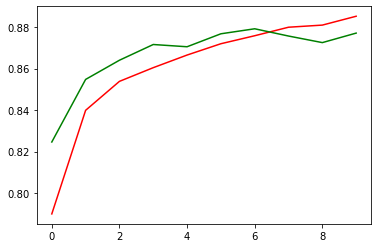

In [9]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')

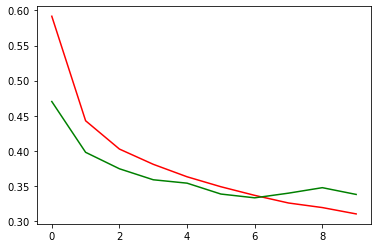

In [10]:
# 對訓練過程的損失函數繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')

In [11]:
predictions = model.predict_classes(x_test_norm)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


prediction: [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 2 8 0]
actual    : [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


In [12]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 實物測試 
利用Windows圖形介面，透過拖曳，取得圖片檔，顯示並使用已訓練好模型進行預測，並顯示  

為了可以拖曳圖片後，顯示影像需安裝以下2個套件  

pip install windnd

pip install pillow

In [13]:
# 在CMD下安裝 pip install windnd與pip install pillow
import tkinter as tk
from tkinter.messagebox import showinfo
import windnd
from PIL import Image, ImageTk
from skimage import io
from skimage.transform import resize
import numpy as np

def dragged_files(files):
    #取得檔案路徑(只能取英文路徑)
    msg = '\n'.join((item.decode('gbk') for item in files))
    
    #顯示圖片
    im = Image.open(msg) #只能辨識英文路徑
    img = ImageTk.PhotoImage(im)
    img_lab.config(image=img)
    img_lab.image = img
    img_lab.pack()
    
    #進行預測
    image1 = io.imread(msg, as_gray=True)
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1, 28, 28) #/ 255
    X1 = np.abs(1-X1)
    predictions = model.predict_classes(X1)
    
    #顯示影像與圖片
    print(fashion_mnist_labels[int(predictions)])   
    print(predictions)
    plt.imshow(X1.reshape(28,28))
    plt.show() 
    
    #顯示預測值
    strVar.set(f'該圖片為- {fashion_mnist_labels[int(predictions)]} -')
    
window = tk.Tk()
window.geometry('300x320')
window.title('圖片辨識')

#顯示答案
strVar = tk.StringVar()  #建立可更改Label之變數
strVar.set("  ")
resultLab = tk.Label(window,
                     textvariable = strVar,
                     font = ('Arial', 12),
                     width = 30, height = 2)
resultLab.pack()

#圖檔frame
textImg = tk.StringVar()
textImg.set('請拖曳圖片到此，進行辨識')
img_lab = tk.Label(window,
                    textvariable = textImg,
                    font = ('Arial', 12),
                    width = 300, height = 300)
img_lab.pack()

windnd.hook_dropfiles(window, func=dragged_files)
window.mainloop()

**執行結果**
<img src="https://github.com/Yi-Huei/bin/blob/master/images/DL_Clothes.png?raw=true" style="zoom:60%" />

**結論:準確度為86.61%，並不高，且測試後出錯也不少**

## 完整程式碼

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

ds = tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train),(x_test, y_test) = ds

# labels
fashion_mnist_labels = ["T袖/上衣",   # index 0
                        "長褲",       # index 1
                        "套頭衫",     # index 2 
                        "洋裝",       # index 3 
                        "外套",       # index 4
                        "涼鞋",       # index 5
                        "襯衫",       # index 6 
                        "運動鞋",     # index 7 
                        "皮包",       # index 8 
                        "短靴"]       # index 9

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

#模型: Deep Learning
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #圖片28*28pix，input為這784
  tf.keras.layers.Dense(128, activation='relu'),  #Dense為連結層，128個神經元
  tf.keras.layers.Dropout(0.2),                   #訓練過程中隨機丟棄20%神經元
  tf.keras.layers.Dense(10, activation='softmax') #結果0~9，10個結果
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) 
model.compile(optimizer=optimizer, #'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)
score=model.evaluate(x_test_norm, y_test, verbose=0)
print(score)

predictions = model.predict_classes(x_test_norm)
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])